
**train.csv**: A full training dataset with the following attributes:

*   **text**: the text of the article; could be incomplete
*   **id**: unique id for a news article
*   **title**: the title of a news article
*   **author**: author of the news article
*   **label**: a label that marks the article as potentially unreliable
```
    1: unreliable or Fake news
    0: reliable or Real news
```

**test.csv**: A testing training dataset with all the same attributes at train.csv without the label.

**submit.csv**: A sample submission that you can

[**Link for Data Set**](https://www.kaggle.com/c/fake-news/data)


# Importing the Dependencies

In [ ]:
# numpy used for making numpy arrays
import numpy as np

# pandas used for creating data frames and storing data in them
import pandas as pd

# regular expression library for searching word in text or paragraph
import re

# stopwords from natural language tool kit for identifyingand removing the stopwords like where, and, the, they, there,... etc from the text
from nltk.corpus import stopwords

# PorterStemmer stemmes our word or give root word to our word
from nltk.stem.porter import PorterStemmer

# from feature_extraction this TfidfVectorizer is imported to convert text into feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# train_test_split is used to split data into training data and testing data
from sklearn.model_selection import train_test_split

# Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables
from sklearn.linear_model import LogisticRegression

# Accuracy metric is used to measures how often a machine learning model correctly predicts the outcome
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# random library of python
import random

In [ ]:
# downloading the stopwords that doesn't add much value to the text and need to be removed
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Pre-processing

In [ ]:
# Mounting the google drive to load data into the python script
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Printing the list of files available to load data
!ls /content/drive/MyDrive/ML

dhoniretires_tweets.csv  magic04.data  spam.csv  train.csv


In [ ]:
# loading the data set in pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/ML/train.csv')

In [ ]:
# This prints (x,y) where x are No. of rows and y as No. of columns
news_dataset.shape

(20800, 5)

In [ ]:
# Print the first 5 rows of the data set
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with the empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# seprating the data and lable
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming :

Stemming is the process of reducing a word to its Root word

example :
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

Creating the function for stemming

In [ ]:
# declaring the function for the stemming
def stemming(content):
    #  this line basically excludes every thing that is not alphabets or words from the text passed as content in the function
    # things other than alphabet are numbers, punctuation and etc
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    # to convert all the alphabets into lowercase letters
    stemmed_content = stemmed_content.lower()
    # spliting it to the respective list
    stemmed_content = stemmed_content.split()
    # taking each and every word and stemming it i.e. converting every word to ist root word via port_stem() function
    # in the for loop we are removing the stopwords and choosing only the words that are not stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # joining all the words
    stemmed_content = ' '.join(stemmed_content)
    # returning the stemmed content from the fumction
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and the label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# this is converting the textual data into numerical data
# we do this by using function TfidfVectorizer() find the term frequency and inverse document frequency of the word
# this converts the data into its respective feature vectors
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the data set to training and test data

*   __80%__ of the **Training Data**
*   __20%__ of the **Testing Data**

In [ ]:
# here 0.2 repersents 20% X is processed content column and Y is the label column
# stratify basically maintainces the proportion of Zero's and One's in the training and testing data both as it was in the original data before splitting
# random_state basically decides the pattern of the data is to splitted according to the integer passed to it
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)

# **Logistic Regression Model**

Training the Model : **Logistic Regression** Model

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

### Sigmoid Function
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC7oKCCzx27XsaY33cn8SOl25r1qbk5UJVnQ&usqp=CAU)

|var| description |
|---|-----------------------|
| x | input features |
| y | prediction probability|
| $w_{0}$ | biases |
| $w_{1}$ | weights |

here the threshold value is 0.5
```
    if ( value > 0.5 )
      label the news as 1
      news is fake
    else if ( value is < 0.5 )
        label the news as 0
        news is real
```

In [ ]:
# initalizing the model to be on logistic regression
lg_model = LogisticRegression()

In [ ]:
# training the model by using fit function and passing the X_train and Y_train data as parameters
lg_model.fit(X_train, Y_train)

LogisticRegression()

# Evaluation of the Trained **Logistic Regression Model**

Accuracy Score on training data

In [ ]:
# accuracy score on the training data
X_train_prediction = lg_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Accuracy Score of the training data :  0.9865985576923076
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8310
           1       0.98      0.99      0.99      8330

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640

[[8136  174]
 [  49 8281]]


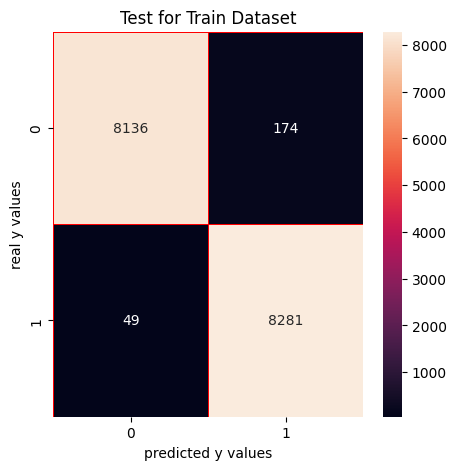

In [ ]:
print("Accuracy Score of the training data : ", training_data_accuracy)
print(classification_report(Y_train, X_train_prediction))

# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train,X_train_prediction))
cm_lrc = confusion_matrix(Y_train,X_train_prediction)

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Train Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Accuracy Score on testing data

In [ ]:
# accuracy score on the testing data
X_test_prediction = lg_model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Accuracy Score of the testing data :  0.9790865384615385
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160

[[2004   73]
 [  14 2069]]


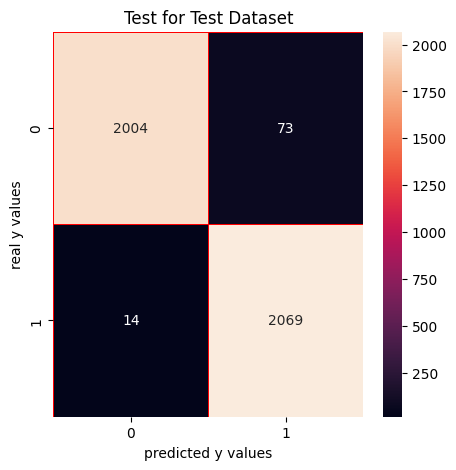

In [ ]:
# print(classification_report(X_test,X_test_prediction));
print("Accuracy Score of the testing data : ", testing_data_accuracy)
print(classification_report(Y_test, X_test_prediction))

# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,X_test_prediction))
cm_lrc = confusion_matrix(Y_test,X_test_prediction)

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# **K-Nearest Neighbour**

In [ ]:
# initalizing the model to be on K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=521)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=521)

In [ ]:
X_test_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2077
           1       0.79      0.99      0.88      2083

    accuracy                           0.86      4160
   macro avg       0.89      0.86      0.86      4160
weighted avg       0.89      0.86      0.86      4160



# Making the Predictive System

In [ ]:
print(X_test.shape ,Y_test.shape)

(4160, 17128) (4160,)


In [ ]:
xCase = random.randrange(0,4159)
X_news = X_test[335]

prediction = lg_model.predict(X_news)
print(prediction)

if (prediction[0] == 0):
    print('The news is Real')
else:
    print('The news is Fake')

print(X_news[0,13521])

[0]
The news is Real
0.0


In [ ]:
# cross checking the prediction
print(Y_test[xCase])

1


# Generating pickle file for Implementaion of the Model

In [ ]:
import pickle
pickle.dump(lg_model, open('lg_model.pkl', 'wb'))